In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as ply

In [2]:
data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
## null values in each column
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

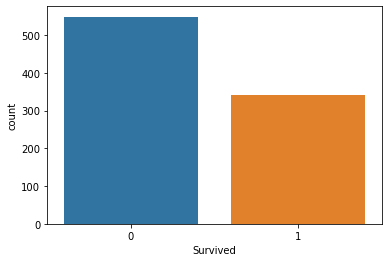

In [5]:
# comparing survivors with non survivors
sns.countplot(x= "Survived", data = data)
plt.show()

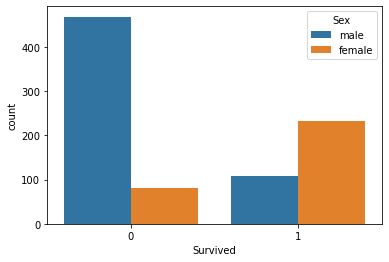

In [6]:
# comparing survivors with respect to sex
sns.countplot(x="Survived", data = data, hue = "Sex")
plt.show()

c:\Users\Pj158\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


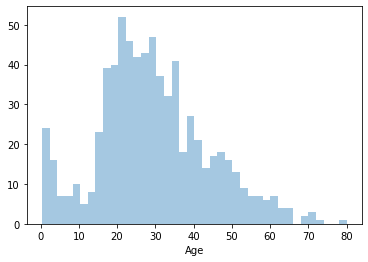

In [7]:
# count of passengers with respect to age
sns.distplot(data["Age"].dropna(), kde=False, bins = 40)
plt.show()

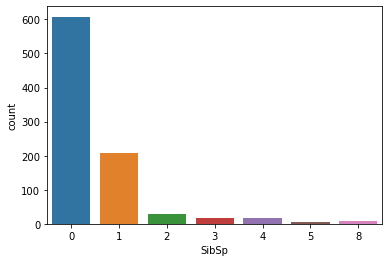

In [8]:
# count of siblings, distribution
sns.countplot(x="SibSp", data = data)
plt.show()

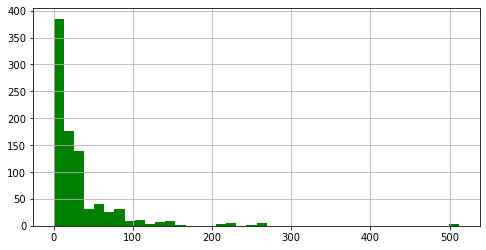

In [9]:
# Distribution of fareprice
data["Fare"].hist(color = 'green', bins=40, figsize=(8,4))
plt.show()

In [10]:
# replacing missing data

In [ ]:
# finding relation between age and Plcass to replace missing data according to age
sns.boxplot(x="Pclass", y = "Age", data= data)
plt.show()

In [11]:
test_ids = test["PassengerId"]
def clean(data):
    data = data.drop(["Ticket", "Cabin", "Name", "PassengerId"], axis = 1)
    
    cols = ["SibSp", "Parch", "Fare", "Age"]
    for col in cols:
        data[col].fillna(data[col].median(), inplace = True)
        
    data.Embarked.fillna("U", inplace = True)
    return data
data = clean(data)
test = clean(test)

In [12]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

cols = ["Sex", "Embarked"]

for col in cols:
    data[col] = le.fit_transform(data[col])
    test[col] = le.fit_transform(test[col])
    print(le.classes_)
    
data.head(5)

['female' 'male']
['C' 'Q' 'S']


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

y = data["Survived"]
X = data.drop("Survived", axis = 1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [14]:
clf = LogisticRegression(random_state = 0, max_iter = 1000).fit(X_train, y_train)

In [15]:
prediction = clf.predict(X_val)
from sklearn.metrics import accuracy_score
accuracy_score(y_val, prediction)

0.8100558659217877

In [16]:
submission_preds = clf.predict(test)
len(submission_preds)

418

In [17]:
df = pd.DataFrame({"PassengerId":test_ids.values, "Survived":submission_preds})

In [18]:
df.to_csv("Submission_Prediction.csv", index = False)